In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/habermans-survival-data-set/haberman.csv


In [29]:
#importing necesary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading .csv data
df = df = pd.read_csv("/kaggle/input/habermans-survival-data-set/haberman.csv",names =  ['Age', 'Op_Year', 'axil_nodes', 'Surv_status'])
df.head()

,Age,Op_Year,axil_nodes,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [30]:
df.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [31]:
# (Q) how many data-points and features?
df.shape

(306, 4)

In [32]:
#(Q) What are the column names in our dataset?
df.columns

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [33]:
#(Q) How many data points for each class are present?
df["Surv_status"].value_counts()

1    225
2     81
Name: Surv_status, dtype: int64

## Bivariate Analysis

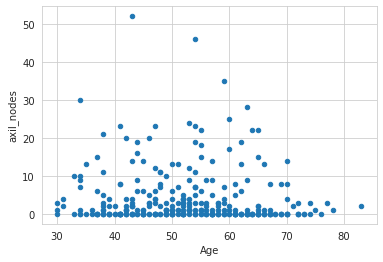

In [34]:
#2-D scatter plot:
df.plot(kind = "scatter" , x = 'Age' , y = 'axil_nodes')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


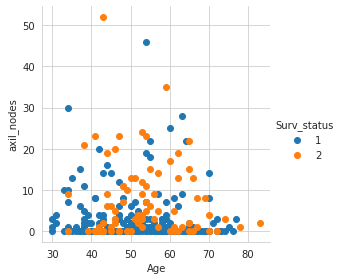

In [35]:
# 2-D Scatter plot with color-coding for Survival.
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="Surv_status", size=4) \
   .map(plt.scatter, "Age", "axil_nodes") \
   .add_legend();
plt.show();


## Observation:
people with Age<40 have a high chance of Survival

In [45]:
import plotly.express as px
fig = px.scatter_3d(df, x='Age',y='axil_nodes',z = 'Op_Year',color='Surv_status' )
fig.show()


## Observation
People having <1 Axil nodes have a higher chance of survival

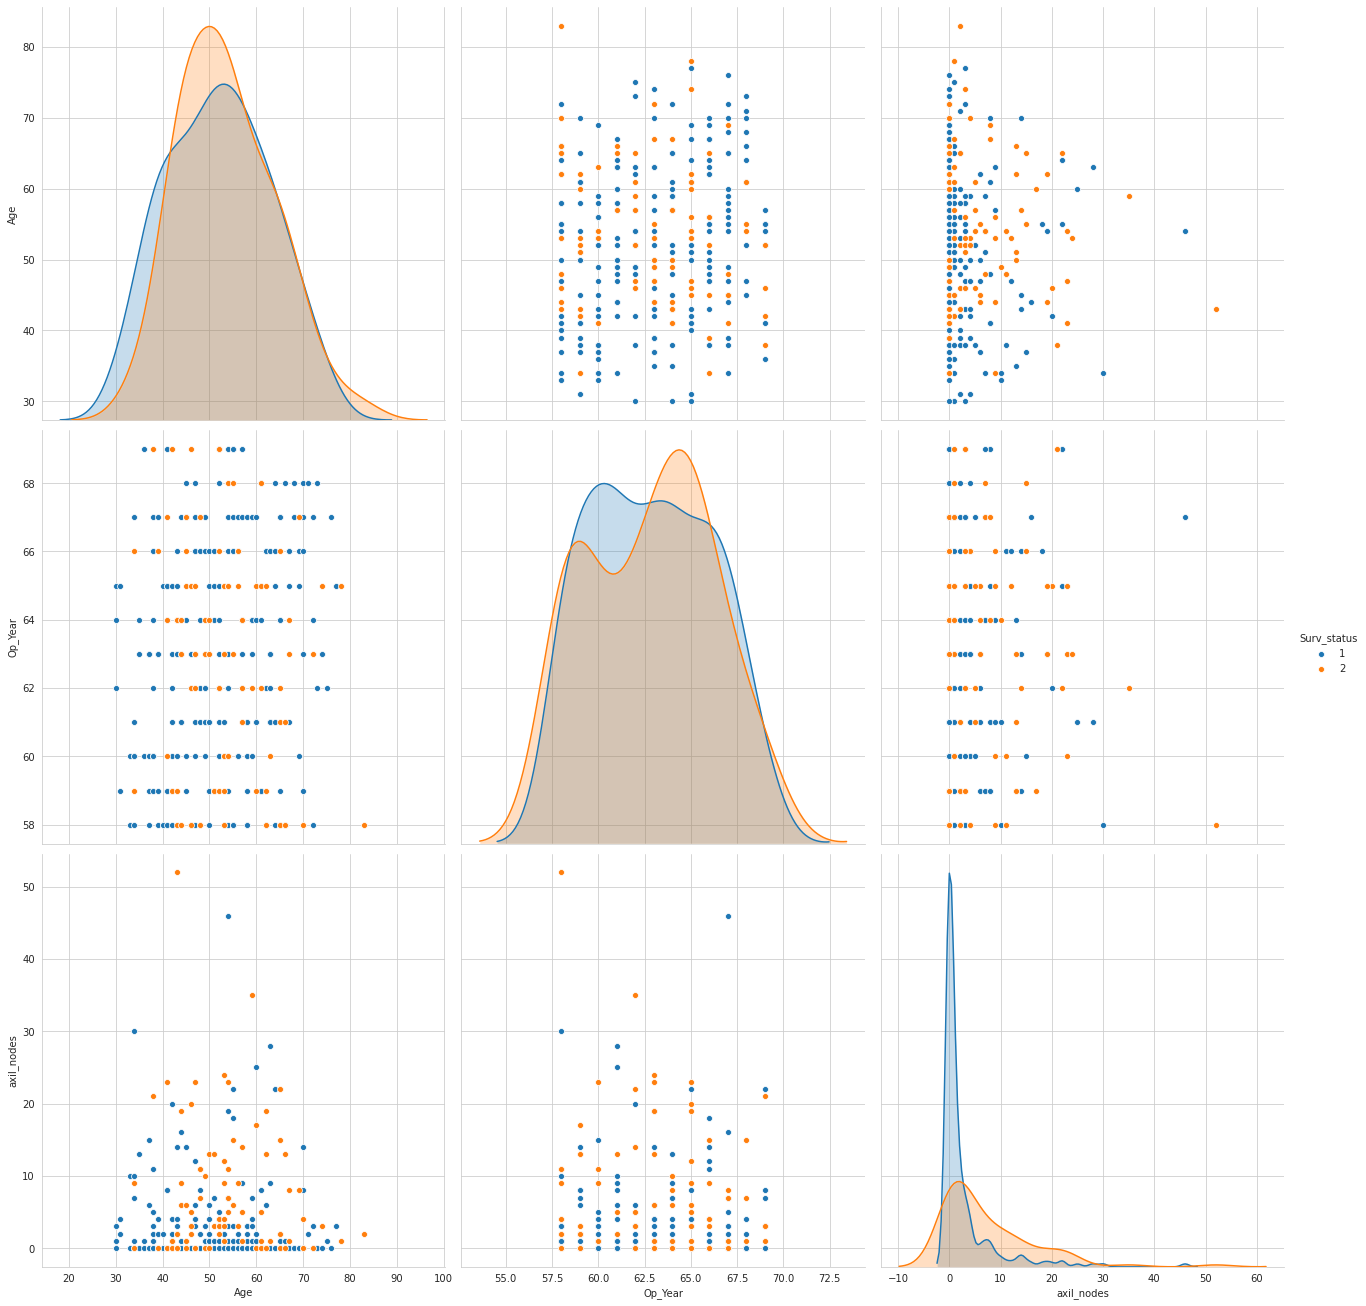

In [50]:
#3D Pair Plot
sns.set_style("whitegrid");
sns.pairplot(df,hue ='Surv_status',height = 6)
plt.show()

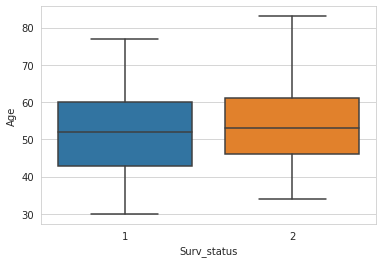

In [55]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Surv_status',y='Age', data=df)
plt.show()


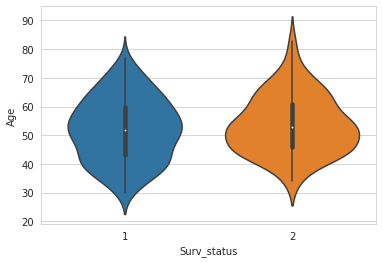

In [56]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x='Surv_status',y='Age', data=df, size=8)
plt.show()

**Final Observations**
* People having <1 Axil nodes have a higher chance of survival
* people with Age<40 have a high chance of Survival